## imports

In [1]:
# to read any rno-g data root file and plot waveforms and extract analysis variables such as snr
import sys, os
import matplotlib.cm as cm
sys.path.append(os.path.abspath('/data/user/sanyukta/rno_code'))
from reading.data_reading import *
from functions.functions import *

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [2]:
# constants
pa_chs = [0,1,2,3]
hpols = [8,4]
uvs = [5,6,7]
deep_chs = np.concatenate((pa_chs,hpols,uvs))

CAL_PULSER_THRESHOLD = 200000 #for cal-pulser run filter
selector = [lambda event_info: (event_info.sysclk - event_info.sysclkLastPPS[0]) % (2**32) <= CAL_PULSER_THRESHOLD]

## reading root

In [3]:
st_id = 11
att = 0
fiber = 0
run = 1785
input_dir = f'/data/user/sanyukta/rno_data/cal_pulser/station{st_id}/fiber{fiber}/{att}dB/station{st_id}_run{run}_combined.root'
# alternatively can use any path to the desired root file
events, times, volts = get_eventsvoltstraces(basic_read_root(input_dir, selector), band_pass=1, pulse_filter=1)


 reading /data/user/sanyukta/rno_data/cal_pulser/station11/fiber0/0dB/station11_run1785_combined.root ......


WARNING - 2025-09-09 10:56:31,738 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>53% of Vrms), removing by fitting.
/tmp/ipykernel_2333578/1343561875.py:8: RuntimeWarning: overflow encountered in scalar subtract
  selector = [lambda event_info: (event_info.sysclk - event_info.sysclkLastPPS[0]) % (2**32) <= CAL_PULSER_THRESHOLD]


## plotting waveform

In [4]:
# averaging wfs for all chs
ch_ids = [0,1,2,3,8,4,5,6,7]
avg_volt = {}
for ch in ch_ids:
    avg_volt[ch] = align_and_average_voltage_traces([volts[event_id][ch] for event_id, event in enumerate(events)])


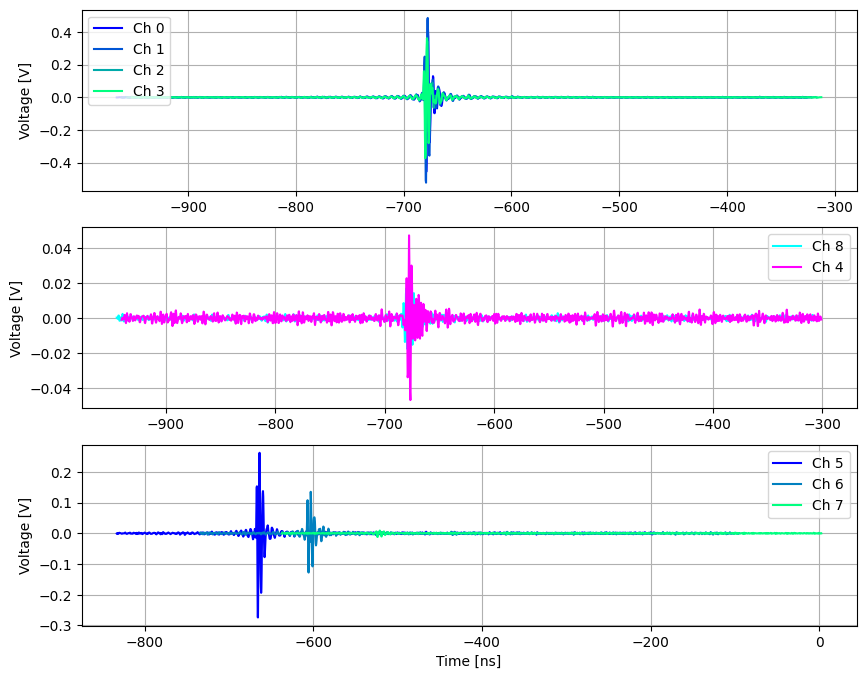

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))
plt.xlabel('Time [ns]')

colors = cm.winter(np.linspace(0, 1, len(pa_chs)))
for i, ch in enumerate(pa_chs):
    ax[0].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

colors = cm.cool(np.linspace(0, 1, len(hpols))) 
for i, ch in enumerate(hpols):
    ax[1].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

colors = cm.winter(np.linspace(0, 1, len(uvs))) 
for i, ch in enumerate(uvs):
    ax[2].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

for i in range(3):
    ax[i].set_ylabel('Voltage [V]')
    ax[i].grid()
    ax[i].legend()

## Pulser drops

In [ ]:
in_dir = f'/data/user/sanyukta/rno_data/pulser_drops'
station_id = 14
sampling_rate = 2.4 * units.GHz
runs = [f for f in os.listdir(f'{in_dir}/st{station_id}') if f.endswith('.root')]

for run in runs:
    input_dir = f'/data/user/sanyukta/rno_data/pulser_drops/st{station_id}/{run}'
    # reader = basic_read_root(input_dir, sampling_rate=sampling_rate)
    # for i, event in enumerate(reader.run()):
    #     print(f'Event {i}, Event number: {event}')
    events, times, volts = get_eventsvoltstraces(basic_read_root(input_dir, sampling_rate=sampling_rate), band_pass=1, pulse_filter=0, glitch_filter=0)
    cpevents, cptimes, cpvolts = get_eventsvoltstraces(basic_read_root(input_dir, selectors=selector sampling_rate=sampling_rate), band_pass=1, pulse_filter=1, glitch_filter=0)
    print(f'Run: {run}, Number of events: {len(events)}')


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500026_combined.root ......


WARNING - 2025-09-09 10:56:36,698 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:36,729 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>145% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:36,753 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>89% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:36,815 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:36,974 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.


Run: station14_run500026_combined.root, Number of events: 57

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500006_combined.root ......
Run: station14_run500006_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500019_combined.root ......
Run: station14_run500019_combined.root, Number of events: 2

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500025_combined.root ......


WARNING - 2025-09-09 10:56:37,095 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>188% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,107 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>125% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,118 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>106% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,130 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>89% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,143 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>125% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,154 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>95% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:37,166 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offse

Run: station14_run500025_combined.root, Number of events: 16

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500001_combined.root ......
Run: station14_run500001_combined.root, Number of events: 3

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500000_combined.root ......


WARNING - 2025-09-09 10:56:37,478 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>175% of Vrms), removing by fitting.


Run: station14_run500000_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500013_combined.root ......
Run: station14_run500013_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500005_combined.root ......
Run: station14_run500005_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500002_combined.root ......


WARNING - 2025-09-09 10:56:37,713 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>75% of Vrms), removing by fitting.


Run: station14_run500002_combined.root, Number of events: 5

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500017_combined.root ......
Run: station14_run500017_combined.root, Number of events: 2

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500020_combined.root ......
Run: station14_run500020_combined.root, Number of events: 3

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500018_combined.root ......


WARNING - 2025-09-09 10:56:37,983 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.


Run: station14_run500018_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500010_combined.root ......
Run: station14_run500010_combined.root, Number of events: 2

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500015_combined.root ......


WARNING - 2025-09-09 10:56:38,250 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>50% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,262 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>73% of Vrms), removing by fitting.


Run: station14_run500015_combined.root, Number of events: 4

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500016_combined.root ......


WARNING - 2025-09-09 10:56:38,566 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>59% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,595 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>65% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,653 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>66% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,671 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,689 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>103% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,707 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>121% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:38,783 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets

Run: station14_run500016_combined.root, Number of events: 71

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500021_combined.root ......
Run: station14_run500021_combined.root, Number of events: 10

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500008_combined.root ......


WARNING - 2025-09-09 10:56:39,448 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.


Run: station14_run500008_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500011_combined.root ......
Run: station14_run500011_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500004_combined.root ......
Run: station14_run500004_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500014_combined.root ......


WARNING - 2025-09-09 10:56:39,524 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>100% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:39,699 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>102% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:39,712 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>131% of Vrms), removing by fitting.


Run: station14_run500014_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500024_combined.root ......


WARNING - 2025-09-09 10:56:39,810 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>77% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:39,833 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>57% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:39,845 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:39,928 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>111% of Vrms), removing by fitting.


Run: station14_run500024_combined.root, Number of events: 36

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500007_combined.root ......
Run: station14_run500007_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500009_combined.root ......
Run: station14_run500009_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500023_combined.root ......


WARNING - 2025-09-09 10:56:40,347 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>64% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,428 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>72% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,440 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>69% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,452 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>76% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,463 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>126% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,475 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>152% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:40,487 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets

Run: station14_run500023_combined.root, Number of events: 68

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500012_combined.root ......
Run: station14_run500012_combined.root, Number of events: 2

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500003_combined.root ......


WARNING - 2025-09-09 10:56:41,411 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>71% of Vrms), removing by fitting.
WARNING - 2025-09-09 10:56:41,423 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>72% of Vrms), removing by fitting.


Run: station14_run500003_combined.root, Number of events: 1

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500022_combined.root ......
Run: station14_run500022_combined.root, Number of events: 6
